In [22]:
import pandas as pd

In [23]:
df=pd.read_csv('grade.csv')
df

,High School GPA,ExtraCuriccular,Parental income,Hours studied,Entrance Exam,Distance from college(km),Internet availability,Result
0,5.40,3,200000,5,Poor,6,No,Fail
1,5.80,4,250000,6,Average,7,No,Fail
2,6.10,5,300000,8,Average,3,No,Fail
3,6.90,5,375000,8,Poor,3,Yes,Fail
4,7.00,3,278000,9,Average,10,No,Pass
5,7.40,4,400000,9,Good,8,Yes,Pass
6,7.60,5,700000,10,Good,4,Yes,Pass
7,8.22,6,560000,11,Good,2,Yes,Pass
8,8.24,6,450000,13,Average,4,Yes,Pass
9,8.90,2,100000,13,Good,24,Yes,Pass


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   High School GPA            15 non-null     float64
 1   ExtraCuriccular            15 non-null     int64  
 2   Parental income            15 non-null     int64  
 3   Hours studied              15 non-null     int64  
 4   Entrance Exam              15 non-null     object 
 5   Distance from college(km)  15 non-null     int64  
 6   Internet availability      15 non-null     object 
 7   Result                     15 non-null     object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.1+ KB


In [25]:
df.head()

,High School GPA,ExtraCuriccular,Parental income,Hours studied,Entrance Exam,Distance from college(km),Internet availability,Result
0,5.4,3,200000,5,Poor,6,No,Fail
1,5.8,4,250000,6,Average,7,No,Fail
2,6.1,5,300000,8,Average,3,No,Fail
3,6.9,5,375000,8,Poor,3,Yes,Fail
4,7.0,3,278000,9,Average,10,No,Pass


In [26]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Entrance Exam']= label_encoder.fit_transform(df['Entrance Exam'])

df['Entrance Exam'].unique()

array([2, 0, 1])

In [27]:
df['Internet availability']=label_encoder.fit_transform(df['Internet availability'])
df['Internet availability'].unique()

array([0, 1])

In [28]:
df

,High School GPA,ExtraCuriccular,Parental income,Hours studied,Entrance Exam,Distance from college(km),Internet availability,Result
0,5.40,3,200000,5,2,6,0,Fail
1,5.80,4,250000,6,0,7,0,Fail
2,6.10,5,300000,8,0,3,0,Fail
3,6.90,5,375000,8,2,3,1,Fail
4,7.00,3,278000,9,0,10,0,Pass
5,7.40,4,400000,9,1,8,1,Pass
6,7.60,5,700000,10,1,4,1,Pass
7,8.22,6,560000,11,1,2,1,Pass
8,8.24,6,450000,13,0,4,1,Pass
9,8.90,2,100000,13,1,24,1,Pass


In [29]:
X = df.drop(['Parental income', 'Distance from college(km)','Result'],axis=1)
features=['High School GPA','ExtraCuriccular','Hours studied','Entrance Exam','Internet availability']
X=df[features]

In [30]:
X

,High School GPA,ExtraCuriccular,Hours studied,Entrance Exam,Internet availability
0,5.40,3,5,2,0
1,5.80,4,6,0,0
2,6.10,5,8,0,0
3,6.90,5,8,2,1
4,7.00,3,9,0,0
5,7.40,4,9,1,1
6,7.60,5,10,1,1
7,8.22,6,11,1,1
8,8.24,6,13,0,1
9,8.90,2,13,1,1


In [31]:
y=df['Result']
y

,Result
0,Fail
1,Fail
2,Fail
3,Fail
4,Pass
5,Pass
6,Pass
7,Pass
8,Pass
9,Pass


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [39]:
input_data = pd.DataFrame([[7.58, 5, 3, 5, 2]], columns=['High School GPA','ExtraCuriccular',
       'Hours studied','Entrance Exam','Internet availability'])
prediction =model.predict(input_data)
print("The result according to the given data is",prediction)

The result according to the given data is ['Pass']


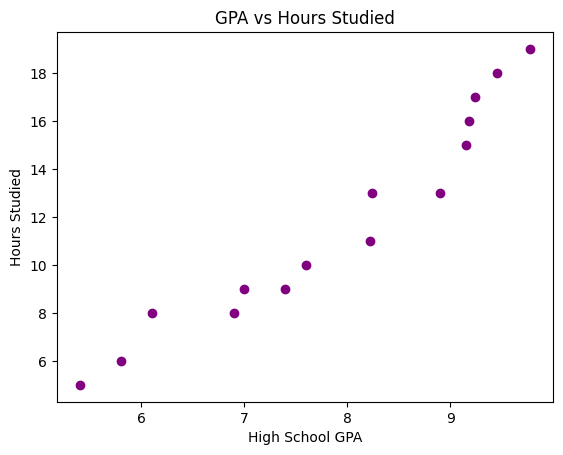

In [40]:
import matplotlib.pyplot as plt
gpa=df['High School GPA']
hours=df['Hours studied']
plt.scatter(gpa,hours, color='purple')
plt.title('GPA vs Hours Studied')
plt.xlabel('High School GPA')
plt.ylabel('Hours Studied')
plt.show()

In [48]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of the model:", accuracy)


Accuracy of the model: 0.8


In [35]:
print(accuracy_score(y_test, predic))